In [85]:
%%time
import gzip
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

Wall time: 0 ns


In [86]:
%%time
# Useful additional packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
np.version.version

import liepack

Wall time: 1.01 ms


In [87]:
%%time
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import  Aer, transpile, IBMQ, assemble
from qiskit.circuit.library import CHGate
from qiskit.quantum_info.operators import Operator
from qiskit.aqua.operators import PrimitiveOp, CircuitStateFn
from qiskit.aqua.operators.primitive_ops import MatrixOp
from qiskit.aqua.operators.converters import CircuitSampler
from qiskit.aqua.operators.expectations import MatrixExpectation # factory or matirx?
from qiskit.aqua.operators.list_ops import ComposedOp
from qiskit.aqua.operators import ListOp
from qiskit.aqua.components.initial_states import Zero

Wall time: 0 ns


In [88]:
from geomstats.geometry.special_orthogonal import SpecialOrthogonal
from geomstats.geometry.lie_algebra import MatrixLieAlgebra
from geomstats.learning.pca import TangentPCA

In [89]:
%%time
provider = IBMQ.load_account()

__init__.discover_credentials:INFO:2021-04-27 21:14:36,176: Using credentials from qiskitrc
ibmqfactory.load_account:WARNING:2021-04-27 21:14:36,469: Credentials are already in use. The existing account in the session will be replaced.


Wall time: 3.93 s


In [90]:
%%time
# print(Aer.backends())
simulator = Aer.get_backend("statevector_simulator")
# simulator.set_option(method=)
my_sampler = CircuitSampler(backend=simulator, attach_results=True, param_qobj=False)  # read up on this more
my_expectation = MatrixExpectation()

INFO: statevector backend only works with shot=1, changing shots from 1024 to 1.
INFO: 
Qiskit Terra version: 0.16.4
Backend: 'statevector_simulator (AerProvider)', with following setting:
{'basis_gates': ['u1', 'u2', 'u3', 'u', 'p', 'r', 'rx', 'ry', 'rz', 'id', 'x', 'y', 'z', 'h', 's', 'sdg', 'sx', 't', 'tdg', 'swap', 'cx', 'cy', 'cz', 'csx', 'cp', 'cu1', 'cu2', 'cu3', 'rxx', 'ryy', 'rzz', 'rzx', 'ccx', 'cswap', 'mcx', 'mcy', 'mcz', 'mcsx', 'mcp', 'mcu1', 'mcu2', 'mcu3', 'mcrx', 'mcry', 'mcrz', 'mcr', 'mcswap', 'unitary', 'diagonal', 'multiplexer', 'initialize', 'kraus', 'roerror', 'delay'], 'coupling_map': None}
{'initial_layout': None, 'seed_transpiler': None, 'optimization_level': None}
RunConfig(max_credits=10, shots=1)
{'timeout': None}
{}
{}
Measurement mitigation: None


Wall time: 5 ms


In [91]:
%%time
# EMNIST decoder

decoder = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

Wall time: 0 ns


In [92]:
%%time
images_raw = gzip.open("data/MNIST/MNIST_GZ/train-images-idx3-ubyte.gz", "r")
labels_raw = gzip.open("data/MNIST/MNIST_GZ/train-labels-idx1-ubyte.gz")


image_size = 28
num_images = 512 # how many images per batch

images_raw.read(16) # reads the data type
labels_raw.read(8) # reads the data type

def get_data(images, labels):
    buf_images = images.read(image_size * image_size * num_images)
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(num_images, image_size, image_size, 1)
    
    buf_labels = labels.read(num_images)
    labels = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int32)
    
    return images, labels

Wall time: 3 ms


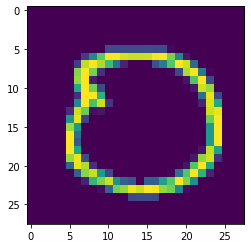

0
Wall time: 130 ms


In [93]:
%%time
# print images
data = get_data(images_raw, labels_raw)

images = data[0]
labels = data[1]



sort_index = np.argsort(data[1], axis=0)

sorted_images = data[0][sort_index]
sorted_labels = data[1][sort_index]

sorted_data = sorted_images, sorted_labels

image = np.asarray(sorted_images[1]).T.squeeze()
plt.imshow(image)
plt.show()

print(decoder[sorted_labels[1]])

In [94]:
%%time
print(sorted_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 

In [95]:
%%time
def get_num_cls(data):
    labels = np.array(data[1])
    one_hot_labels = to_categorical(labels)
    
    return one_hot_labels.shape[1]


Wall time: 0 ns


In [96]:
%%time
N = get_num_cls(data)
print(N)

10
Wall time: 0 ns


In [97]:
class AdamOptim():
    """From https://towardsdatascience.com/how-to-implement-an-adam-optimizer-from-scratch-76e7b217f1cc"""
    def __init__(self, num_of_keys=1, eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.m_dw = {key: 0 for key in range(num_of_keys)}
        self.v_dw = {key: 0 for key in range(num_of_keys)}
        self.m_db, self.v_db = 0, 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.eta = eta
    def update(self, key, t, w, b, dw, db):
        ## dw, db are from current minibatch
        ## momentum beta 1
        # *** weights *** #
        self.m_dw[key] = self.beta1*self.m_dw[key] + (1-self.beta1)*dw
        # *** biases *** #
        self.m_db = self.beta1*self.m_db + (1-self.beta1)*db

        ## rms beta 2
        # *** weights *** #
        self.v_dw[key] = self.beta2*self.v_dw[key] + (1-self.beta2)*(dw**2)
        # *** biases *** #
        self.v_db = self.beta2*self.v_db + (1-self.beta2)*(db)

        ## bias correction
        m_dw_corr = self.m_dw[key]/(1-self.beta1**t + self.epsilon)
        m_db_corr = self.m_db/(1-self.beta1**t + self.epsilon)
        v_dw_corr = self.v_dw[key]/(1-self.beta2**t + self.epsilon)
        v_db_corr = self.v_db/(1-self.beta2**t + self.epsilon)

        ## update weights and biases
        w = w - self.eta*(m_dw_corr/(np.sqrt(v_dw_corr)+self.epsilon))
        b = b - self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))
        return w, b

In [179]:
# %%time

class Forward_and_backward:
    """see:
        https://arxiv.org/pdf/1908.08385.pdf
        equations 1 and 2
        also see:
        https://qiskit.org/documentation/stubs/qiskit.circuit.library.CHGate.html
    """
    def __init__(self, N, data, num_of_it):
        """"""
        self.num_of_it = num_of_it
        self.target_N = N
        self.N = self.target_N - 1
        self.data = data
        self.alpha = np.arange(start=1, stop=self.target_N ** 2 + 1, dtype=np.complex) # kind of like biases
        # self.K = 1
        # self.P = []
        # self.P_idx = 0
        self.total_error = 0


    
    def H(self):
        """"""
        h = []
        
        """qc_i = QuantumCircuit(self.target_N)
        qc_i.h(0)
        for i in range(1, self.target_N):
            qc_i.h(i)
            qc_i.cx(i - 1, i)
        qobj_i = assemble(qc_i)
        state_vec_i = simulator.run(qobj_i).result().get_statevector()"""
        for i in range(self.target_N):
            qc_k = QuantumCircuit(self.target_N)
            qc_k.h(0)
            for k in range(1, self.target_N):
                qc_k.h(k)
                qc_k.cx(k-1, k)
            # qobj_k = assemble(qc_k)
            # state_vec_k = simulator.run(qobj_k).result().get_statevector()
            op = PrimitiveOp(qc_k)
            # print(state_vec_k.shape)
            for k in range(self.target_N ):
                term0 = np.exp(((1j * 2 * np.pi * i * k)  / self.target_N), dtype=np.complex_) * op
                try:
                    term1 = term1 + term0
                except:
                    term1 = term0

            h.append(term1)
            # print(h[i])

        h = np.asarray(h, dtype=object)
        H_op = np.asarray(h / np.sqrt(self.target_N, dtype=np.complex), dtype=object)

        # print(H_op.shape)
        
        return H_op
        
    def quNit(self):
        qr = QuantumRegister(self.target_N, 'a')
        
        S3 =np.zeros(shape=(self.target_N, self.target_N), dtype=np.complex_)
        np.fill_diagonal(S3, -(self.target_N - 1) / 2 * self.target_N)
        # print(self.x.shape)
        # print(self.W[self.i].shape)
        sum_of_weights = np.sum(np.vdot(self.W[self.i], self.x), ) # all x's of type i
        # print(sum_of_weights)
        Z = np.exp((0 + 1j) * S3 * sum_of_weights)
        
        # qobj = assemble(Zero(self.target_N).construct_circuit(mode="circuit"))
        # result = simulator.run(qobj).result()
        # zeros = result.get_statevector()
        
        qn = Z @ self.H()
        # print(qn.shape)
        # print(type(Zero))
        # print(qn)
        # print(Zero)
        return qn # init state should be 0

 ##################################################   
    
    def driver_for_SUG(self):
        """finds the value for alpha which is a self.target_N set"""
        
        SU_N_alpha = self.Euler_angle_param() # should be 10, 10 shape for target n == 10
        
        # print(SU_N_alpha.shape)
        
        return SU_N_alpha

    def A(self, lie_alge):
        """-1 from all indicies"""
        a = 0
        
        # print(lie_alge.shape)
        
        for k in range(2, self.target_N + 1):
            # print("k = ", k)
            term0 = 1j * lie_alge[2] * self.alpha[(2 * k - 3) - 1]
            # print(term0)
            term1 = np.exp(term0)
            term2 = 1j * lie_alge[((k-1) ** 2 + 1) - 1]
            term3 = np.exp(term2)
            term4 = self.alpha[(2 * (k - 1)) - 1]
            term5 = term3 * term4
            term6 = term1 * term5
            
            a += np.prod(term6)
        
        # print("A.shape = ", a.shape)
        
        return a

    def SU_of_Nm1(self, n):
        n += 1
        so3 = SpecialOrthogonal(n=n, point_type='matrix')
        # print(type(so3))
        metric = so3.bi_invariant_metric

        data = so3.random_uniform(n_samples=(self.target_N))

        tpca = TangentPCA(metric=metric, n_components=(self.target_N))  ## second dim?
        tpca = tpca.fit(data)
        tangent_projected_data = tpca.transform(data)
        return tangent_projected_data
    
    def SU_of_N(self, n):
        n += 1
        so3 = SpecialOrthogonal(n=n, point_type='matrix')
        # print(type(so3))
        metric = so3.bi_invariant_metric

        data = so3.random_uniform(n_samples=(self.target_N + 1)) 

        tpca = TangentPCA(metric=metric, n_components=(self.target_N + 1))  ## second dim?
        tpca = tpca.fit(data)
        tangent_projected_data = tpca.transform(data)
        return tangent_projected_data
    
    def Euler_angle_param(self):
        """"""
        lie_alge = MatrixLieAlgebra(dim=self.target_N, n=self.target_N) # first dim
        lie_algebra = lie_alge.baker_campbell_hausdorff(self.SU_of_Nm1(self.N), self.SU_of_Nm1(self.N), self.N)
        term0 = self.A(lie_algebra.flatten())
        term1 = self.SU_of_Nm1(self.N)
        # print(term1.shape)
        term2 = term0 * term1
        # print(term2.shape)
        term3 = np.exp(1j * np.sum(lie_algebra) * np.sum(self.alpha))
        # print(term3.shape)
        term4 = term2 * term3
        # print(term4.shape)

        return term4
        
        
        """print("SU(N), N = ", self.N)
        if self.N == self.target_N + 1:
            print("SU of N FOR {} FOUND".format(self.N - 1))
            return self.SU_of_N

        if self.N == 2:
            self.SU_of_Nm1 = np.asarray([[1]], dtype=np.complex_)
        
        
        
        # self.P.append(self.SU_of_Nm1 * np.exp(1j * self.mat()) * self.SU_of_Nm1)
        lie_alge = self.lie_algebra()

        print("alpha = ", self.alpha.shape)
        print("lie_alge = ", lie_alge)
        
        if self.N == 2:
            term0 = self.A(lie_alge)
        else:
            term0 = self.A(lie_alge) * self.SU_of_Nm1
        term1 = np.exp(1j * np.sum(lie_alge) * np.sum(self.alpha))
        self.N += 1
        # self.P_idx += 1
        self.SU_of_N =  term0 * term1
        
        print("sun", self.SU_of_N)
        print("sun - 1", self.SU_of_Nm1)
        self.SU_of_Nm1 = self.Euler_angle_param()
        return self.SU_of_N"""
    ############################################
    
    
    def forward(self):
        """"""
        # init values for forward
        ket_x = self.quNit()
        SU_N = self.driver_for_SUG()
        
        # weighted ket_x
        
        # print(ket_x[0])
        # print(SU_N.shape)
        
        ket_x = SU_N * ket_x[np.newaxis]

        ket_x_list = []
        # ket_x = ListOp([ListOp([x for x in op]) for op in ket_x])
        for i, array in enumerate(ket_x):
            row = []
            for k, op in enumerate(array):
                cr = ClassicalRegister(self.target_N, 'creg{}{}'.format(i, k))
                # print(op)
                measurement = my_expectation.convert(op)
                # print(type(measurement))
                measurement = measurement.to_circuit()
                measurement.add_register(cr)
                measurement.measure([1] * self.target_N, [0] * self.target_N) # might just need 1?
                qobj = assemble(measurement, shots=self.target_N ** 2)
                job = simulator.run(qobj)
                hist = job.result().get_statevector()
                row.append(hist)
            ket_x_list.append(row)
        
        ket_x = np.asarray(ket_x_list)
        
        print(ket_x)
        print(ket_x.shape)
        
        
        
        def Purity(N, ket_x):
            """"""
            bra_x = np.asmatrix(ket_x).H
            
            return ((ket_x @ bra_x) / N) ** 2
            
        Pa = Purity(self.target_N, ket_x)
        # print(Pa)
        Pb = np.argmax(np.diag(Pa))
        print("prediction = ", Pb)

        return Pb, ket_x

    def backward(self, pred_dict, i):
        """"""
        qr = QuantumRegister(1, 'b')
        cr = ClassicalRegister(1, 'creg_b')
        SU_N = self.driver_for_SUG()
        qc = self.quNit()
        Mk = self.target_N * self.target_N
        
        Pk = np.matrix(pred_dict[decoder[i]][1]) @ np.matrix(pred_dict[decoder[i]][1]).H  / Mk

        Pk = np.asmatrix(SU_N) @ Pk @ np.asmatrix(SU_N).H

        Pk = Pk @ qc
        
        """Pk_list = []
        Pk = ListOp([ListOp([x for x in op]) for op in Pk])
        for op in Pk:
            row = []
            for x in op:
                coeff = x.coeff
                x = x.to_circuit_op().to_circuit()
                x.add_register(qr)
                x.add_register(cr)
                x.measure(qr[0], cr[0])
                # print("x = ", x)
                job = execute(x, simulator)
                result = job.result()
                outputstate = result.get_statevector(x, decimals=10)
                row.append(outputstate.tolist()[0] * coeff)
                # print("output = ", outputstate)
            Pk_list.append(row)
            # print("row = ", row)
        
        Pk = tf.convert_to_tensor(Pk_list)"""
        
        self.Ek = 1 - Pk

    def cost(self):
        Mk = self.target_N * self.target_N
        
        self.total_error += Mk * self.Ek
        self.total_error /= self.target_N

        E =self.total_error[self.i]
        print(E)
        return E
    
        
    def train(self):
        """"""
        adam = AdamOptim(num_of_keys=self.target_N)
        pred_dict = {}
        self.total_error = 0
        init_W = True
        self.W = {}
        
        
        for j in range(self.num_of_it):
            for i in range(self.target_N):
                self.i = i
                print("working on {}s".format(decoder[i]))
                sorted_images = self.data[0]
                sorted_labels = self.data[1]
                # print(sorted_labels.shape)
                y = sorted_labels[sorted_labels == i]
                # print(y)
                self.x = sorted_images[sorted_labels == i]
                
                try:
                    # print(self.x.shape)
                    self.x = self.x.squeeze(axis=(0, -1))
                    # print(self.x.shape)
                except(ValueError):
                    # print(self.x.shape)
                    self.x = self.x.squeeze(axis=-1)
                    # print(self.x.shape)
                    
                """image = self.x[0]
                plt.imshow(image)
                plt.show()"""

                if init_W:
                    print("init W")
                    self.W[self.i] = np.random.uniform(low=-1, high=1, size=self.x.shape) # learnable similar to weights

                pred_dict[decoder[i]] = self.forward()
                self.backward(pred_dict, i)
                
                dw = self.W[self.i]
                db = self.alpha
                
                self.W[self.i], self.alpha = adam.update(key=i, t=j, w=self.W[self.i], b=self.alpha, dw=dw, db=db)
                
            init_W = False
            print(tf.math.maximum(tf.math.real(total_error)))
                
                
            

In [180]:
# %time
train = Forward_and_backward(N, sorted_data, 10)

In [181]:
# %%time
train.train()

working on 0s
init W


INFO: Total Assembly Time - 0.00000 (ms)
INFO: Total Assembly Time - 0.00000 (ms)
INFO: Total Assembly Time - 0.00000 (ms)
INFO: Total Assembly Time - 1.00231 (ms)
INFO: Total Assembly Time - 0.00000 (ms)
INFO: Total Assembly Time - 0.00000 (ms)
INFO: Total Assembly Time - 0.00000 (ms)
INFO: Total Assembly Time - 0.00000 (ms)
INFO: Total Assembly Time - 0.00000 (ms)
INFO: Total Assembly Time - 0.00000 (ms)
INFO: Total Assembly Time - 0.00000 (ms)
INFO: Total Assembly Time - 0.00000 (ms)
INFO: Total Assembly Time - 0.00000 (ms)
INFO: Total Assembly Time - 0.00000 (ms)
INFO: Total Assembly Time - 0.00000 (ms)
INFO: Total Assembly Time - 0.00000 (ms)
INFO: Total Assembly Time - 0.00000 (ms)
INFO: Total Assembly Time - 0.00000 (ms)
INFO: Total Assembly Time - 0.00000 (ms)
INFO: Total Assembly Time - 1.00255 (ms)
INFO: Total Assembly Time - 0.00000 (ms)
INFO: Total Assembly Time - 0.00000 (ms)
INFO: Total Assembly Time - 0.00000 (ms)
INFO: Total Assembly Time - 0.00000 (ms)
INFO: Total Asse

[[[0.        +0.j 0.        +0.j 0.04419417+0.j ... 0.        +0.j
   0.04419417+0.j 0.04419417+0.j]
  [0.        +0.j 0.        +0.j 0.04419417+0.j ... 0.        +0.j
   0.04419417+0.j 0.04419417+0.j]
  [0.04419417+0.j 0.04419417+0.j 0.        +0.j ... 0.04419417+0.j
   0.        +0.j 0.        +0.j]
  ...
  [0.04419417+0.j 0.04419417+0.j 0.        +0.j ... 0.04419417+0.j
   0.        +0.j 0.        +0.j]
  [0.04419417+0.j 0.04419417+0.j 0.        +0.j ... 0.04419417+0.j
   0.        +0.j 0.        +0.j]
  [0.        +0.j 0.        +0.j 0.04419417+0.j ... 0.        +0.j
   0.04419417+0.j 0.04419417+0.j]]

 [[0.        +0.j 0.        +0.j 0.04419417+0.j ... 0.        +0.j
   0.04419417+0.j 0.04419417+0.j]
  [0.04419417+0.j 0.04419417+0.j 0.        +0.j ... 0.04419417+0.j
   0.        +0.j 0.        +0.j]
  [0.04419417+0.j 0.04419417+0.j 0.        +0.j ... 0.04419417+0.j
   0.        +0.j 0.        +0.j]
  ...
  [0.        +0.j 0.        +0.j 0.04419417+0.j ... 0.        +0.j
   0.04419

ValueError: shape too large to be a matrix.